In [11]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix , classification_report
from tensorflow.keras import datasets, layers, models
%matplotlib inline

In [2]:
# Download CIFAR-10 dataset from tensorflow library
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [3]:
# Printing counts of bases
print("X_train shape: ", X_train.shape) # 32 x 32 image; and 3 is for rgb channel
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (50000, 32, 32, 3)
y_train shape:  (50000, 1)
X_test shape:  (10000, 32, 32, 3)
y_test shape:  (10000, 1)


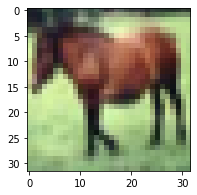

In [4]:
# Plot a random element
plt.figure(figsize=(14, 3))
plt.imshow(X_train[7])

In [5]:
y_train[:5]
# Here we can see it y dataset it 2D array, we need single dimension

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)
# First param is of row size(which we don't want to change so specify -1)
# Second param will be left as blank, if we want to flatten it

y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [17]:
# Similarly for y_test
y_test = y_test.reshape(-1,)

In [7]:
X_train[1]

array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]

Here we can see values are in range of 0-255

Now to normalize the data, we need to divide this X data by 255 so we can have value between 0 to 1


In [8]:
X_train = X_train/255
X_test = X_test/255
X_train[1]

array([[[0.60392157, 0.69411765, 0.73333333],
        [0.49411765, 0.5372549 , 0.53333333],
        [0.41176471, 0.40784314, 0.37254902],
        ...,
        [0.35686275, 0.37254902, 0.27843137],
        [0.34117647, 0.35294118, 0.27843137],
        [0.30980392, 0.31764706, 0.2745098 ]],

       [[0.54901961, 0.62745098, 0.6627451 ],
        [0.56862745, 0.6       , 0.60392157],
        [0.49019608, 0.49019608, 0.4627451 ],
        ...,
        [0.37647059, 0.38823529, 0.30588235],
        [0.30196078, 0.31372549, 0.24313725],
        [0.27843137, 0.28627451, 0.23921569]],

       [[0.54901961, 0.60784314, 0.64313725],
        [0.54509804, 0.57254902, 0.58431373],
        [0.45098039, 0.45098039, 0.43921569],
        ...,
        [0.30980392, 0.32156863, 0.25098039],
        [0.26666667, 0.2745098 , 0.21568627],
        [0.2627451 , 0.27058824, 0.21568627]],

       ...,

       [[0.68627451, 0.65490196, 0.65098039],
        [0.61176471, 0.60392157, 0.62745098],
        [0.60392157, 0

## Using ANN for image classification:

In [9]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

# Whenever we have y as one hot encoded vector then we use categorical_crossentropy
# But when y is some value(number) then we use sparse_categorical_crossentropy
ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 55s 32ms/step - loss: 1.8113 - accuracy: 0.3562
Epoch 2/5
1563/1563 [==============================] - 50s 32ms/step - loss: 1.6247 - accuracy: 0.4259
Epoch 3/5
1563/1563 [==============================] - 50s 32ms/step - loss: 1.5444 - accuracy: 0.4555
Epoch 4/5
1563/1563 [==============================] - 50s 32ms/step - loss: 1.4827 - accuracy: 0.4772
Epoch 5/5
1563/1563 [==============================] - 50s 32ms/step - loss: 1.4340 - accuracy: 0.4958


In [13]:
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.65      0.46      0.54      1000
           1       0.73      0.36      0.49      1000
           2       0.43      0.31      0.36      1000
           3       0.40      0.20      0.26      1000
           4       0.43      0.43      0.43      1000
           5       0.42      0.35      0.38      1000
           6       0.40      0.74      0.52      1000
           7       0.46      0.64      0.54      1000
           8       0.52      0.73      0.61      1000
           9       0.54      0.59      0.57      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.47     10000
weighted avg       0.50      0.48      0.47     10000



### Here we can see that ANN is not giving good accuacy i.e only around ~49% for train and test data

### So we will use CNN now

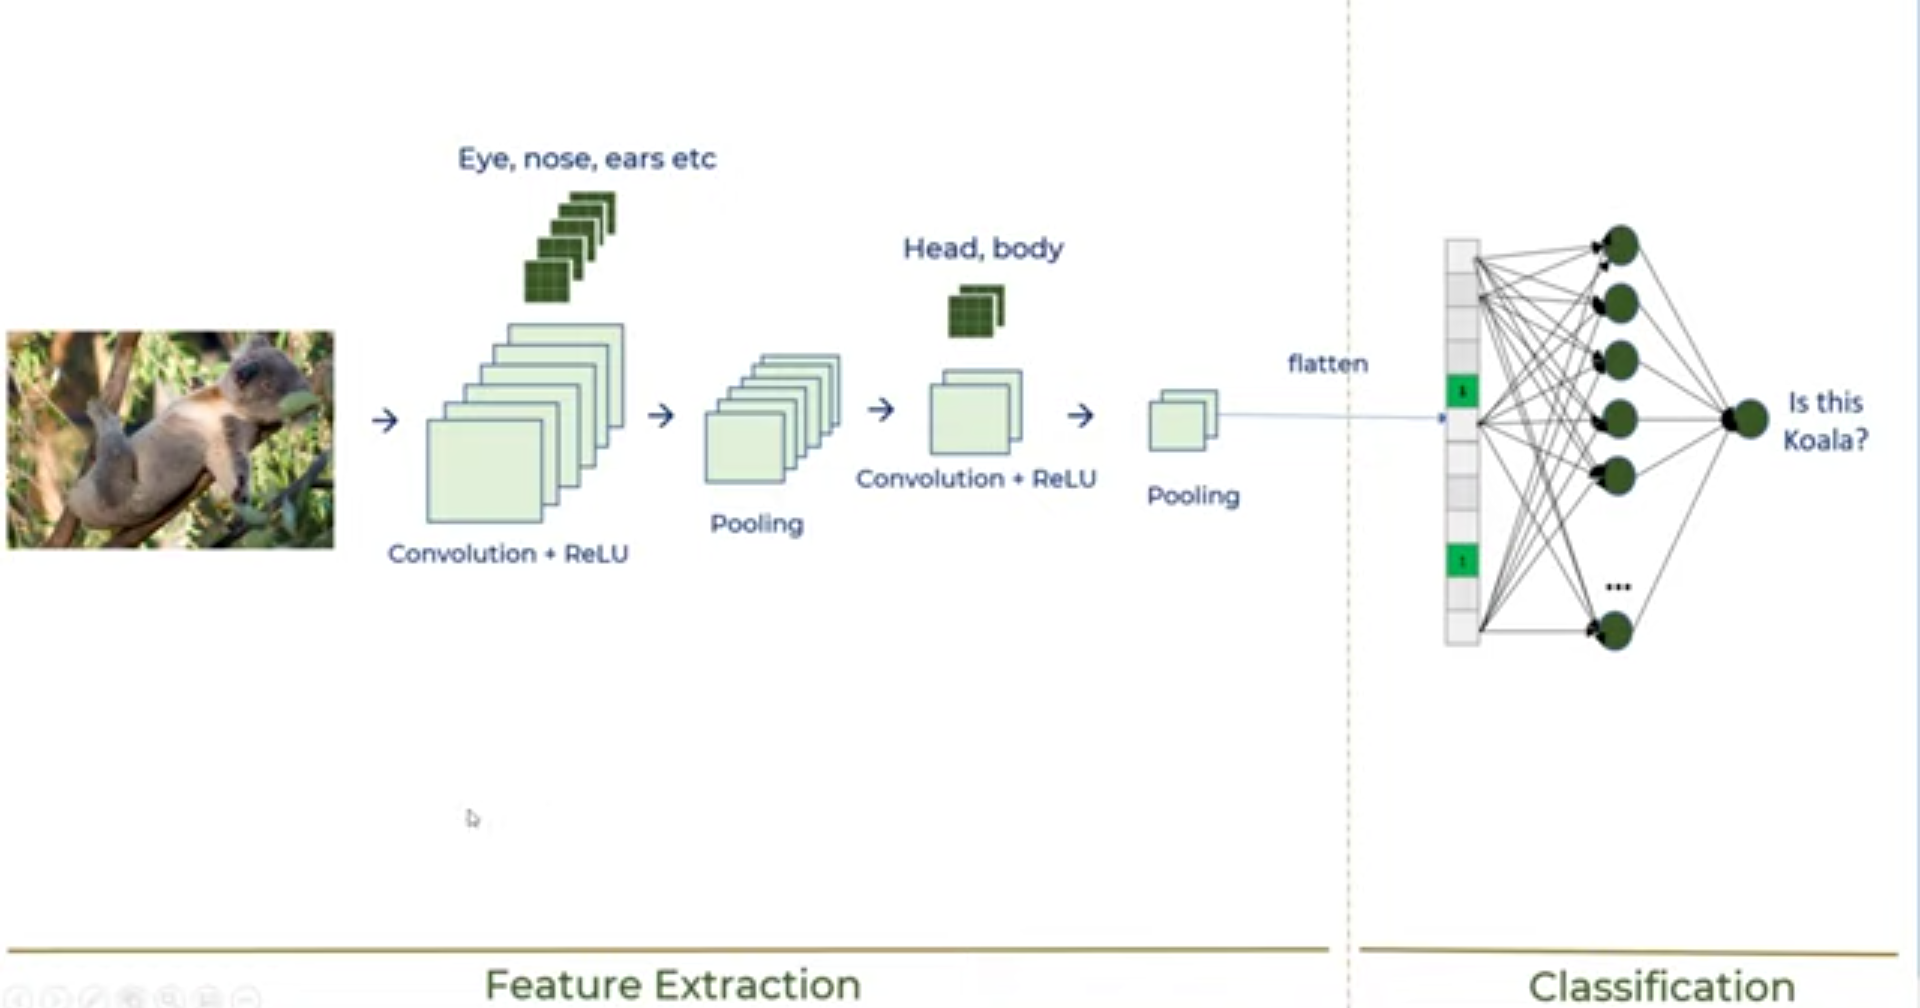

In [14]:
# As we know, CNN is just operation performed before ANN for images
# So we will create model which will do CNN operation first then create dense neural network
cnn = models.Sequential([
    # CNN(feature extraction):
    # We are using some random 32 filters here of size 3x3; activation will be relu as it is less expensive
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)), # We are going to use Max pooling here
    
    # We can also have more than one layer of filters and pooling
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # ANN(for classification):
    
    layers.Flatten(), # Here we don't specify any space, neural network can automatically do that
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [15]:
# Compile the model where we specify optimizer, loss and metrics on which model needs to be trained
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
# Fit the model
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 28s 13ms/step - loss: 1.4591 - accuracy: 0.4768
Epoch 2/10
1563/1563 [==============================] - 23s 14ms/step - loss: 1.1131 - accuracy: 0.6097
Epoch 3/10
1563/1563 [==============================] - 23s 14ms/step - loss: 0.9857 - accuracy: 0.6569
Epoch 4/10
1563/1563 [==============================] - 23s 14ms/step - loss: 0.9064 - accuracy: 0.6842
Epoch 5/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.8399 - accuracy: 0.7078
Epoch 6/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.7835 - accuracy: 0.7259
Epoch 7/10
1563/1563 [==============================] - 23s 14ms/step - loss: 0.7366 - accuracy: 0.7436
Epoch 8/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.6870 - accuracy: 0.7601
Epoch 9/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.6501 - accuracy: 0.7745
Epoch 10/10
1563/1563 [==============================] - 26s 16m

## We can see got around ~79% accuracy using CNN which is substantial jump compared to ANN

In [18]:
# Now for testing data
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[2.0189169e-03, 1.7812877e-03, 1.0492187e-01, 8.2729268e-01,
        1.7948409e-04, 4.4752564e-02, 1.7034385e-02, 5.0484814e-04,
        1.4845375e-03, 2.9532761e-05],
       [3.9204429e-03, 8.9195430e-02, 4.2394009e-07, 1.5872250e-06,
        5.3310839e-07, 7.0459050e-10, 9.3649088e-10, 2.8268385e-09,
        9.0660948e-01, 2.7208542e-04],
       [6.2500350e-02, 2.1975920e-01, 2.7336560e-03, 4.8529431e-03,
        3.3122313e-04, 9.2645532e-05, 2.0787187e-05, 6.6226505e-04,
        6.3498306e-01, 7.4063912e-02],
       [8.4464866e-01, 9.7185178e-03, 2.6119005e-02, 1.3558715e-02,
        5.9219997e-02, 1.3268256e-04, 1.9110179e-03, 1.1387737e-03,
        4.3344483e-02, 2.0808823e-04],
       [7.8320687e-07, 4.7917101e-06, 4.5381095e-02, 7.9531647e-02,
        2.2139058e-01, 5.4810554e-02, 5.9887052e-01, 3.9870151e-06,
        5.9010308e-06, 2.4530314e-07]], dtype=float32)

In [19]:
# To check classification report for testing data

y_pred_class = [np.argmax(element) for element in y_pred] # Selects class with highest value
print("Classification Report: \n", classification_report(y_test, y_pred_class))
# Even though accuracy is 68%, it is fine, because this dataset is tough

Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.76      0.73      1000
           1       0.78      0.84      0.81      1000
           2       0.61      0.55      0.58      1000
           3       0.47      0.54      0.50      1000
           4       0.72      0.50      0.59      1000
           5       0.50      0.70      0.58      1000
           6       0.79      0.74      0.76      1000
           7       0.79      0.67      0.72      1000
           8       0.89      0.72      0.79      1000
           9       0.74      0.82      0.78      1000

    accuracy                           0.68     10000
   macro avg       0.70      0.68      0.68     10000
weighted avg       0.70      0.68      0.68     10000

